# Lista 1 de Procesamento de Linguagem Natural

### Bibliotecas utilizadas

In [ ]:
import re
import pprint as pp
from google.colab import drive
import pandas as pd


### Questão 1


Escreva uma função que recebe uma senha como entrada e verifica
se ela atende aos seguintes critérios de uma senha forte:

• Pelo menos 8 caracteres \\
• Pelo menos uma letra maiúscula e uma letra minúscula \\
• Pelo menos um dígito \\
• Pelo menos um caractere especial (por exemplo, !@#$%&*)

A função deve retornar `True` se a senha for forte e `False` caso contrário. Mostre exemplos.

In [ ]:
def is_password_strong(password):

  pattern = '^(?=.*[A-Z])(?=.*[a-z])(?=.*[0-9])(?=.*\W).{8,}$'
  has_everything = re.compile(pattern).search(password)

  if has_everything:
    return True
  else:
    return False

print(is_password_strong('123456')) # False: Less than eight characters
print(is_password_strong('str0nGPa$$w0rd')) # True
print(is_password_strong('str0ngpa$sword')) # False: No uppercase letters
print(is_password_strong('T3st P@ssw0rd')) # True
print(is_password_strong('strong p4ssw0rd test')) # False: No special characters
print(is_password_strong('Test_p@ssword')) #False: No number

False
True
False
True
False
False


### Questão 2

Escreva uma função que recebe um endereço de e-mail como entrada e verifica se ele é válido de acordo com as regras básicas de formação de um e-mail. Utilize expressões regulares para realizar a validação. A função deve retornar `True` se o endereço de e-mail for válido e `False` caso contrário. Mostre exemplos.

In [ ]:
def is_valid_email(email):

  # Letras, números e ponto final
  # Deve ter um @
  pattern = "^[A-Za-z0-9.]+@[a-z0-9]+\.[a-z]+(\.[a-z]+)?$"

  validate_email = re.compile(pattern).search(email)
  if validate_email:
    return True
  else:
    return False

print(is_valid_email('FulanoDTal43@gmail.com')) # True
print(is_valid_email('teste-em4il.com')) # False: Special characters and no @
print(is_valid_email("foo.bar@gmail.com")) # True
print(is_valid_email("foo.bar@gmail.com.br")) # True
print(is_valid_email("foo.bar@gmail.com.br.br")) # False
print(is_valid_email("foo.bar@gmail.")) # False
print(is_valid_email("foo.bar@gmailcom")) # False
print(is_valid_email("foo.bar@.com")) # False
print(is_valid_email("foo.bargmail.com")) # False
print(is_valid_email("@gmail.com")) # False


True
False
True
True
False
False
False
False
False
False


### Questão 3

Considere o seguinte exemplo de referência de livro em formato de
citação APA: \\
 \\

Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of
statistical natural language processing. MIT press.

Implemente uma função usando expressões regulares que extraia cada autor, ano de publicação, título e editora do livro, para qualquer referência de livro neste formato.

In [ ]:
def extrair_info_citacao(citacao):
    ano_pattern = r'\((\d{4})\).'
    ano = re.search(ano_pattern, citacao)
    ano = ano.group(1) if ano else None

    autores_pattern = r'[A-Z][a-z]+(?:, [A-Z]\. \&?)'
    autores = re.findall(autores_pattern, citacao)

    titulo_pattern = r'\)\. (.*?)\.'
    titulo = re.search(titulo_pattern, citacao)
    titulo = titulo.group(1) if titulo else None
    aux_cite = re.sub(ano_pattern,'',citacao)

    editora_pattern = r'^\.(.*?)\s\.'
    cit_aux = citacao[::-1]
    editora = re.search(editora_pattern,cit_aux)
    editora = editora.group(1)[::-1] if editora else None

    return {
        'Autores': autores,
        'Ano': ano,
        'Título': titulo,
        'Editora': editora
    }

# Exemplo de uso
citacao = "Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of statistical natural language processing. MIT press."
informacoes = extrair_info_citacao(citacao)
pp.pprint(informacoes)


{'Ano': '1999',
 'Autores': ['Manning, C. ', 'Manning, C. ', 'Schutze, H. '],
 'Editora': 'MIT press',
 'Título': 'Foundations of statistical natural language processing'}


### Questão 4

Usando sua base de textos, determine a distribuição de comprimentos dos textos (em quantidade de palavras), listando estas quantidades e plotando um histograma.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PLN/wiki_movie_plots_deduped.csv')

In [ ]:
data

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
...,...,...,...,...,...,...,...,...
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...




---



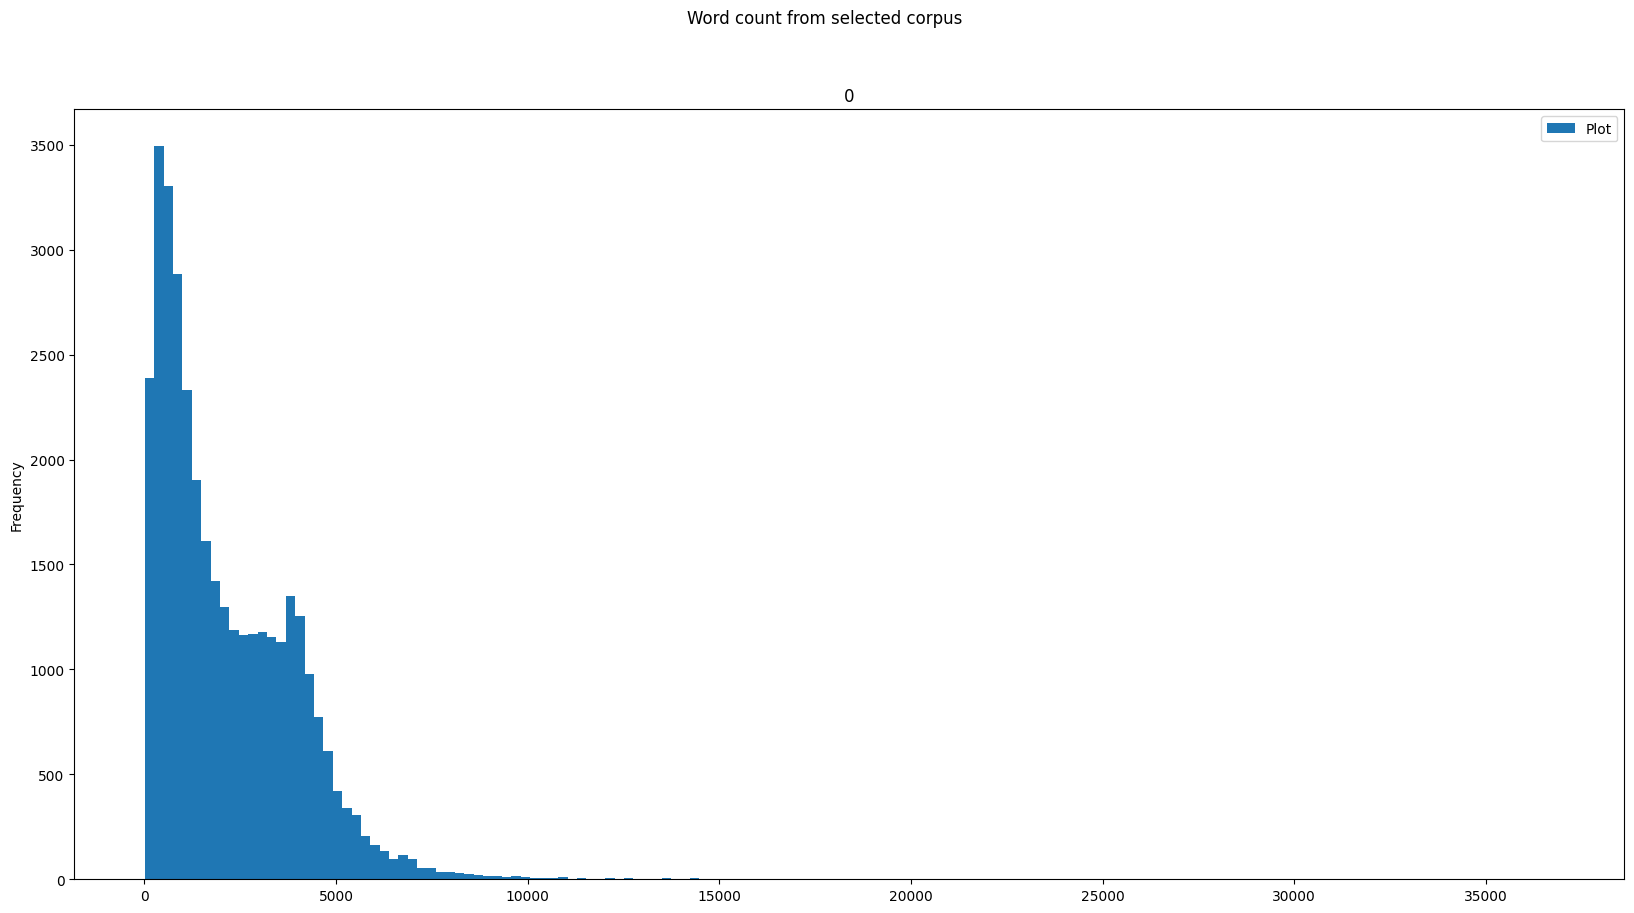

In [ ]:
plot_data = data['Plot']
text_index = 0
x = []
y = []
for plot in plot_data:
  x.append(text_index)
  y.append(len(plot))

df = pd.DataFrame({"Index": x, "Plot": y})
ax = df.plot.hist(column=["Plot"], by="Index",bins=150,
                  title='Word count from selected corpus',
                 figsize=(20, 10))

### Questão 5

Aplique os seguintes passos de pré-processamento aos textos:

• Remova todas as palavras que contêm números;

• Converta as palavras para minúsculas;

• Remova pontuação;

• Tokenize os textos em palavras,  gerando um dicionário único com $n$
tokens e convertendo cada texto em um vetor de dimensão $n$ com a respectiva contagem de palavras.

Em seguida, encontre as 10 palavras mais frequentes da base de textos.

In [ ]:
!pip install unidecode

In [ ]:
import unidecode
from string import punctuation
import nltk
from nltk.tokenize import WordPunctTokenizer,WhitespaceTokenizer
from collections import Counter

In [ ]:
import string


df_text = data['Plot'].copy()

cols = ['statement_clean','statement_tokenized','origin/ethnicity']
pp_df = pd.DataFrame([],columns=cols)
text_without_numbers = []

Tokenizer = WordPunctTokenizer()

for text in df_text:
  tokenized = Tokenizer.tokenize(str(text))
  word_list = []
  for word in tokenized:
    if word not in ['1234567890'] and word not in punctuation:
      word_list.append(unidecode.unidecode(word.lower()))

  text_without_numbers.append(' '.join([word for word in word_list]))
pp_df['statement_clean'] = text_without_numbers

Tokenizer = WhitespaceTokenizer()

pp_df['statement_tokenized'] = pp_df['statement_clean'].apply(lambda x: Tokenizer.tokenize(str(x)))
tokenized_data = pp_df['statement_tokenized']
word_count = Counter([item for sublist in pp_df['statement_tokenized'].values for item in sublist])

bag_of_words = list(word_count.keys())

print(f'lenght of bag of words: {len(bag_of_words)}')
print(f'most common words: {word_count.most_common(10)}')

lenght of bag of words: 133495
most common words: [('the', 759145), ('to', 493656), ('and', 457932), ('a', 361355), ('of', 237569), ('is', 220559), ('in', 216285), ('his', 204670), ('he', 184499), ('s', 167171)]


In [ ]:
pp_df.head()

,statement_clean,statement_tokenized,origin/ethnicity
0,a bartender is working at a saloon serving dri...,"[a, bartender, is, working, at, a, saloon, ser...",NaN
1,the moon painted with a smiling face hangs ove...,"[the, moon, painted, with, a, smiling, face, h...",NaN
2,the film just over a minute long is composed o...,"[the, film, just, over, a, minute, long, is, c...",NaN
3,lasting just 61 seconds and consisting of two ...,"[lasting, just, 61, seconds, and, consisting, ...",NaN
4,the earliest known adaptation of the classic f...,"[the, earliest, known, adaptation, of, the, cl...",NaN


### Questão 6

Aplique os seguintes passos de pré-processamento aos textos processados na questão anterior:

• Remova stopwords;

• Realize rotulação de POS;

• Realize stemização;

$a)$ Exiba os resultados em alguns textos.

$b)$ Verifique quais são as 10 palavras mais frequentes e compare com as 10 palavras mais frequentes da questão anterior.

$c)$ Repita a letra $b)$ usando os tokens stemizados.

$d)$ Verifique quais são as classes gramaticais mais frequentes.

### Continuando o pré-processamento

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer
nltk.download('stopwords')
nltk.download('rslp')
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


#### a) Exiba o resultado em alguns textos

In [ ]:
pp_df['statement_clean'][0]

'a bartender is working at a saloon serving drinks to customers after he fills a stereotypically irish man s bucket with beer carrie nation and her followers burst inside they assault the irish man pulling his hat over his eyes and then dumping the beer over his head the group then begin wrecking the bar smashing the fixtures mirrors and breaking the cash register the bartender then sprays seltzer water in nation s face before a group of policemen appear and order everybody to leave .[ 1'

In [ ]:
pp_df['statement_clean'][1]

'the moon painted with a smiling face hangs over a park at night a young couple walking past a fence learn on a railing and look up the moon smiles they embrace and the moon s smile gets bigger they then sit down on a bench by a tree the moon s view is blocked causing him to frown in the last scene the man fans the woman with his hat because the moon has left the sky and is perched over her shoulder to see everything better'

### b)

In [ ]:
for tokens_list in tokenized_data:
  for token in tokens_list:
    if token in stoplist:
      tokens_list.remove(token)

word_count_sw = Counter([item for sublist in pp_df['statement_tokenized'].values for item in sublist])

bag_of_words_sw = list(word_count.keys())

print(f'lenght of bag of words: {len(bag_of_words_sw)}')
print(f'most common words: {word_count_sw.most_common(10)}')

lenght of bag of words: 133495
most common words: [('the', 392691), ('a', 178467), ('his', 108815), ('he', 75456), ('her', 63871), ('is', 62183), ('to', 59662), ('she', 40108), ('),', 38014), ('and', 30079)]


In [ ]:
pp_df['statement_tokenized'] = tokenized_data
pp_df['statement_tokenized'].head()

,statement_tokenized
0,"[bartender, working, saloon, serving, drinks, ..."
1,"[moon, painted, smiling, face, hangs, park, ni..."
2,"[film, over, minute, long, composed, two, shot..."
3,"[lasting, 61, seconds, consisting, two, shots,..."
4,"[earliest, known, adaptation, classic, fairyta..."


#### c) Repita a letra $b)$ usando os tokens stemizados.

In [ ]:
stemmer = nltk.stem.RSLPStemmer()

for statement in tokenized_data:
  for i in range(len(statement)):
    statement[i] = stemmer.stem(statement[i])


word_count_stem = Counter([item for sublist in pp_df['statement_tokenized'].values for item in sublist])

bag_of_words_stem = list(word_count.keys())

print(f'lenght of bag of words: {len(bag_of_words_stem)}')
print(f'most common words: {word_count_stem.most_common(10)}')

lenght of bag of words: 133495
most common words: [('the', 420112), ('a', 178467), ('hi', 108926), ('he', 78479), ('her', 65402), ('is', 62204), ('to', 59662), ('she', 40373), ('),', 38014), ('find', 30584)]


In [ ]:
pp_df['statement_tokenized'] = tokenized_data
pp_df['statement_tokenized'].head()

,statement_tokenized
0,"[bartend, working, saloon, serving, drink, cus..."
1,"[moon, painted, smiling, fac, hang, park, nigh..."
2,"[film, ov, minut, long, composed, two, shot, f..."
3,"[lasting, 61, second, consisting, two, shot, f..."
4,"[earliest, known, adaptation, classic, fairyta..."


#### d) Verifique quais são as classes gramaticais mais frequentes.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def perform_pos_tagging(texts):
    tagged_texts = []
    for doc in nlp.pipe(texts, batch_size=50, disable=["ner", "lemmatizer"]):
        tagged_texts.append([(token.text, token.pos_) for token in doc])
    return tagged_texts


In [ ]:
from collections import Counter

def count_pos_frequencies(tagged_texts):
    pos_counts = Counter()
    for tags in tagged_texts:
        pos_counts.update(tag[1] for tag in tags)
    return pos_counts


In [ ]:
plot_texts = data['Plot'].dropna().tolist()
pos_tags_spacy = perform_pos_tagging(plot_texts)
pos_frequencies = count_pos_frequencies(pos_tags_spacy)
print(pos_frequencies.most_common(10))


[('NOUN', 2402049), ('VERB', 2005888), ('PUNCT', 1842601), ('PROPN', 1749635), ('ADP', 1505545), ('DET', 1251796), ('PRON', 1180505), ('ADJ', 651667), ('CCONJ', 543738), ('AUX', 536203)]
